# Multilateral Development Institution Data

## Loading Data and Overview

In [28]:
foo <- read.csv("https://tinyurl.com/yb4phxx8") # read in the data

In [29]:
# column names
names(foo)

[1] "Number"                  "Status"                 
 [3] "Cluster"                 "Prefix"                 
 [5] "Type"                    "Country"                
 [7] "Dept"                    "Division"               
 [9] "LTAA"                    "Loan"                   
[11] "ApprovalDate"            "AgreementDate"          
[13] "Agreement"               "EffectivityDate"        
[15] "CancellationDate"        "FinancialCompletionDate"
[17] "OriginalCompletionDate"  "RevisedCompletionDate"  
[19] "JSF"                     "Fund"                   
[21] "RevisedAmount"           "Rating"                 
[23] "No"                      "PCR"                    
[25] "CirculationDate"

In [30]:
# dimensions of the data set
dim(foo)

[1] 9016   25

In [31]:
# quick look at the data structure
head(foo)

Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,⋯,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
5001,Financially Completed,,R,RETA,REG,,,"Agriculture, natural resources and rural development",0,⋯,1987-12-31,,1987-12-31,NA,2,0.155,NA,,,
1,Financially Completed,,,ADTA,INO,,,"Agriculture, natural resources and rural development",0,⋯,1968-07-31,,1968-07-31,NA,2,0.080,NA,,,
2,Financially Completed,,,ADTA,KOR,,,"Agriculture, natural resources and rural development",0,⋯,1969-10-31,,1969-10-31,NA,2,0.067,NA,,,
3,Financially Completed,,,ADTA,PHI,,,"Agriculture, natural resources and rural development",0,⋯,1970-01-31,,1970-01-31,NA,2,0.105,NA,,,
4,Financially Completed,,,ADTA,VIE,,,Finance,0,⋯,1972-08-31,,1972-08-31,NA,2,0.115,NA,,,
5,Financially Completed,,,PPTA,PHI,,,Transport,0,⋯,1970-03-31,,1970-03-31,NA,2,0.325,NA,,,


In [32]:
# one thing to be very careful with (in this data set) is the use of dates. 8 columns involve dates.

# take note of the columns representing calendar dates
date.columns <- c(11, 12, 14, 15, 16, 17, 18, 25)

In [33]:
# these columns need some tweaking--I want to address missing values, calling the blank (empty) 
# elements "NA" instead of leaving them blank, and I wish to tell R these are "Date" objects.

for(i in date.columns)  # this "for loop" only loops through the "date.columns" -- no other columns.

  {
  
  # identify which values are missing in the "i"th column of the foo data set
  which_values_are_missing <- which(as.character(foo[, i]) == "")
  
  # those values that are missing (blank) in the "i"th column are replaced by <NA>
  # because R knows how to handle "NA" -- NA means something special in R--blanks are handled 
  # more unpredictably (which is bad).
  foo[which_values_are_missing, i] <- NA
  
  # last step--replace each of these columns (which is structured as a column of "factor" values)
  # as a column of dates--i.e., convert them to an object of "class" = Date. They are dates, after all.
  # And if you convert them to the Date class, R will know they are dates and you can manipulate 
  # dates in a simple, straightforward way. Otherwise, you won't be able to easily manipulate them
  # arithmetically.  E.g., for simple Date operations, see lines 48-58 below...
  # **By the way, if you don't understand what a "factor" is in R, you should Google it.** 
  foo[, i] <- as.Date(as.character(foo[, i]))

  }

# Now R knows that these columns are comprised of dates
# for example...  Replicate this yourself...

# foo[3,12]
# [1] "1968-03-13"

# foo[4,12]
# [1] "1968-07-03"

# foo[3,12] - foo[4,12]
# Time difference of -112 days

# Also, one additional helpful hint... How to eliminate rows with NAs...
# The "is.na" function--for more info, Google it or type ?is.na at the R command prompt in the console.
which.have.NAs <- which(is.na(foo$Rating == TRUE)) # for which rows is the claim "is.na" a TRUE claim?

# Then, if you wanted to, e.g., remove all those rows, retaining only the rows with ratings...
new_foo <- foo[-which.have.NAs, ]
# Notice I called this tweaked data set "new_foo" instead of rewriting over the original data set...
# It's a bit safer to do this, in case I decide I want to quickly revert back to the original data set.


# ASSIGNMENT 1 -- You may want to read ALL the questions before you begin. 
NOTE: FOR ALL QUESTIONS BELOW, ONLY CONSIDER PROJECTS WITH non-missing "Circulation.Date" >= 2008-01-01.   
EXCLUDE ALL OTHER PROJECTS FROM YOUR ANALYSIS.    
YOU MUST provide a link to your R code. ------ DON'T FORGET TO DO THIS!!!!!!!!!!!!    
Take note of the column names: i.e., you can type: names(foo)     
fyi: the column called "Rating" is the success rating at completion. 0 = lowest, 3 = highest.    

In [34]:
# remove all projects without circulation date
foo.has.Circ.Date <- foo[!is.na(foo$CirculationDate),]

# remove all projects w circ date before 2008-01-01
my_foo <- foo.has.Circ.Date[foo.has.Circ.Date$CirculationDate >= '2008-01-01',]

head(my_foo)
dim(my_foo)

,Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,⋯,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
2529,2001,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,⋯,1998-08-31,NA,1996-06-30,NA,2,0.21,2,,13-08,2008-01-17
2530,2002,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,⋯,1998-05-31,NA,1995-11-30,NA,2,0.24,2,,13-08,2008-01-17
2531,2003,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,⋯,1998-04-30,NA,1995-11-30,NA,2,0.35,2,,13-08,2008-01-17
2754,5600,Financially Completed,,R,RETA,REG,PPFD,COCS,Public sector management,0,⋯,2004-10-29,2003-12-31,2003-12-31,NA,2,0.12,2,20-10,,2010-01-15
2904,5624,Financially Completed,,R,RETA,REG,PPFD,COPP,Public sector management,0,⋯,2002-04-30,NA,1997-12-31,NA,2,0.60,3,471-09,,2009-12-29
3059,2440,Financially Completed,,,ADTA,MLD,SFSP-AUS,SAOC**,Public sector management,0,⋯,2003-04-30,NA,1998-06-30,NA,2,0.40,2,309-09,,2009-10-30


[1] 1874   25

# Question 1

When projects are approved, they are approved for a certain period of time (until the time of "original completion date"). While projects are active, this "original" completion date is often pushed out (extended), and then there is a "revised" completion date.

You have been told that project duration at approval is generally about 2 years (24 months). In other words, (purportedly) when projects are approved, the difference between the original project completion date and the the approval date is (supposedly) approximately 24 months. 

#### (a) Is this claim true? Explain. 
(Remember, for this ENTIRE assignment, only consider projects with Circulation.Date >= 2008-01-01. This will be your only reminder...)

Has project duration at approval changed over time (consider projects circulated earlier and circulated later). Be sure to discuss mean durations, median durations, and the interquartile range of durations (using the "quantile" function). 

Approximate suggested length: 3-5 sentences

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.60   13.30   19.73   21.46   26.10  112.30      21 

Warning message:
“Removed 21 rows containing non-finite values (stat_boxplot).”

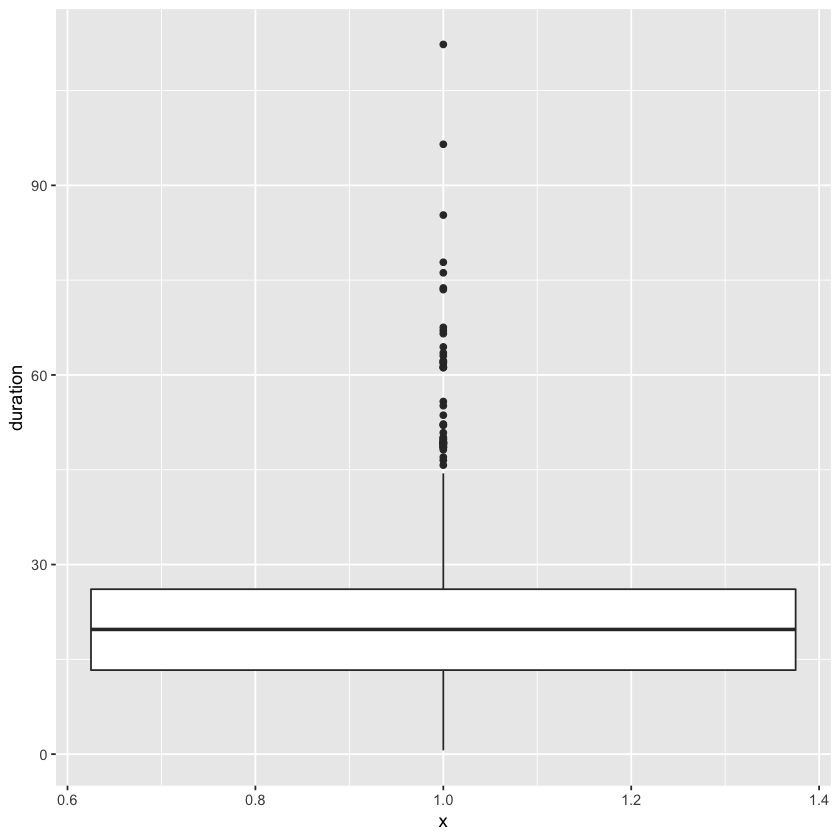

In [35]:
# duration time in months
my_foo$duration <- as.numeric((my_foo$OriginalCompletionDate - my_foo$ApprovalDate)/30)

# 5 point summary
summary(my_foo$duration)
library(ggplot2)
ggplot(my_foo, aes(x=1,y=duration)) + geom_boxplot()

Warning message:
“Removed 21 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 21 rows containing missing values (geom_point).”

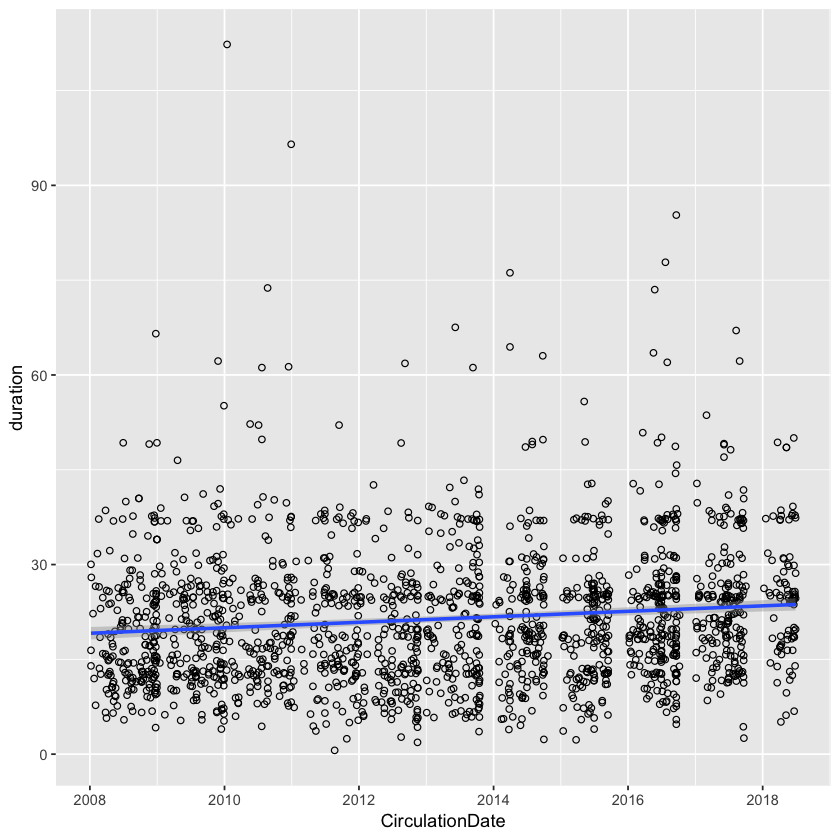

In [36]:
# change over time, based on Circulation Date
ggplot(my_foo, aes(x=CirculationDate, y=duration)) +
    geom_point(shape=1) +
    geom_smooth(method=lm)

In [69]:
# split data by year
foo_08_to_10 <- my_foo[my_foo$CirculationDate < "2010-01-01",]
foo_10_to_12 <- my_foo[my_foo$CirculationDate >= "2010-01-01" & my_foo$CirculationDate < "2012-01-01",]
foo_12_to_14 <- my_foo[my_foo$CirculationDate >= "2012-01-01" & my_foo$CirculationDate < "2014-01-01",]
foo_14_to_16 <- my_foo[my_foo$CirculationDate >= "2014-01-01" & my_foo$CirculationDate < "2016-01-01",]
foo_16_to_inf <- my_foo[my_foo$CirculationDate >= "2016-01-01", ]

# exclude NA
foo_08_to_10.has.Dur <- foo_08_to_10[!is.na(foo_08_to_10$duration),]
foo_10_to_12.has.Dur <- foo_10_to_12[!is.na(foo_10_to_12$duration),]
foo_12_to_14.has.Dur <- foo_12_to_14[!is.na(foo_12_to_14$duration),]
foo_14_to_16.has.Dur <- foo_14_to_16[!is.na(foo_14_to_16$duration),]
foo_16_to_inf.has.Dur <- foo_16_to_inf[!is.na(foo_16_to_inf$duration),]

# print number of exclusions
print(paste0("from '08 to '10: ", nrow(foo_08_to_10) - nrow(foo_08_to_10.has.Dur)))
print(paste0("from '10 to '12: ", nrow(foo_10_to_12) - nrow(foo_10_to_12.has.Dur)))
print(paste0("from '12 to '14: ", nrow(foo_12_to_14) - nrow(foo_12_to_14.has.Dur)))
print(paste0("from '14 to '16: ", nrow(foo_14_to_16) - nrow(foo_14_to_16.has.Dur)))
print(paste0("from '08 to inf: ", nrow(foo_16_to_inf) - nrow(foo_16_to_inf.has.Dur)))

[1] "from '08 to '10: 19"
[1] "from '10 to '12: 2"
[1] "from '12 to '14: 0"
[1] "from '14 to '16: 0"
[1] "from '08 to inf: 0"


In [144]:
duration_over_years <- list()
duration_over_years[[1]] <- c(foo_08_to_10.has.Dur$duration)
duration_over_years[[2]] <- c(foo_10_to_12.has.Dur$duration)
duration_over_years[[3]] <- c(foo_12_to_14.has.Dur$duration)
duration_over_years[[4]] <- c(foo_14_to_16.has.Dur$duration)
duration_over_years[[5]] <- c(foo_16_to_inf.has.Dur$duration)

mean_over_years <- unlist(lapply(duration_over_years,mean))
med_over_years <- unlist(lapply(duration_over_years,median))
iqr_over_years <- unlist(lapply(duration_over_years,IQR))

# create data frame of summary vals by year
years <- c("'08-'10","'10-'12","'12-'14","'14-'16'","'16-inf")
summ_duration <- data.frame(years)
summ_duration$mean <- mean_over_years
summ_duration$median <- med_over_years
summ_duration$IQR <- iqr_over_years

head(summ_duration)

years,mean,median,IQR
'08-'10,20.03621,18.48333,13.02500
'10-'12,21.25578,18.41667,12.50833
'12-'14,19.96728,18.76667,12.96667
'14-'16',21.12036,19.66667,12.53333
'16-inf,23.85481,23.00000,11.46667


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


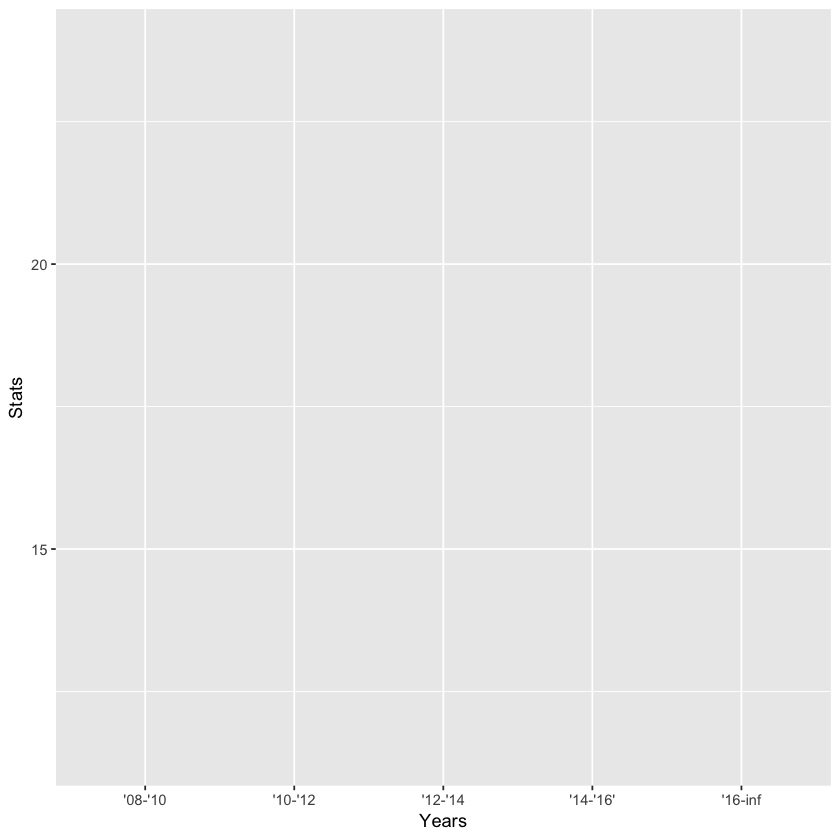

In [155]:
ggplot(summ_duration, aes(x = years)) + 
    geom_line(aes(y = mean), colour="blue") + 
    geom_line(aes(y = median), colour = "grey") + 
    geom_line(aes(y = IQR), colour = "grey") + 
    ylab(label="Stats") + 
    xlab("Years")


#### (b) How does original planned project duration differ from actual duration 
(if actual duration is measured as the duration between "ApprovalDate" and "RevisedCompletionDate"?)  Once again, use means, medians, and interquartile ranges to explain your results. 

Approximate suggested length: 3-5 sentences

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   245.0   485.0   573.5   762.0  3837.0      21 

Warning message:
“Removed 21 rows containing non-finite values (stat_boxplot).”

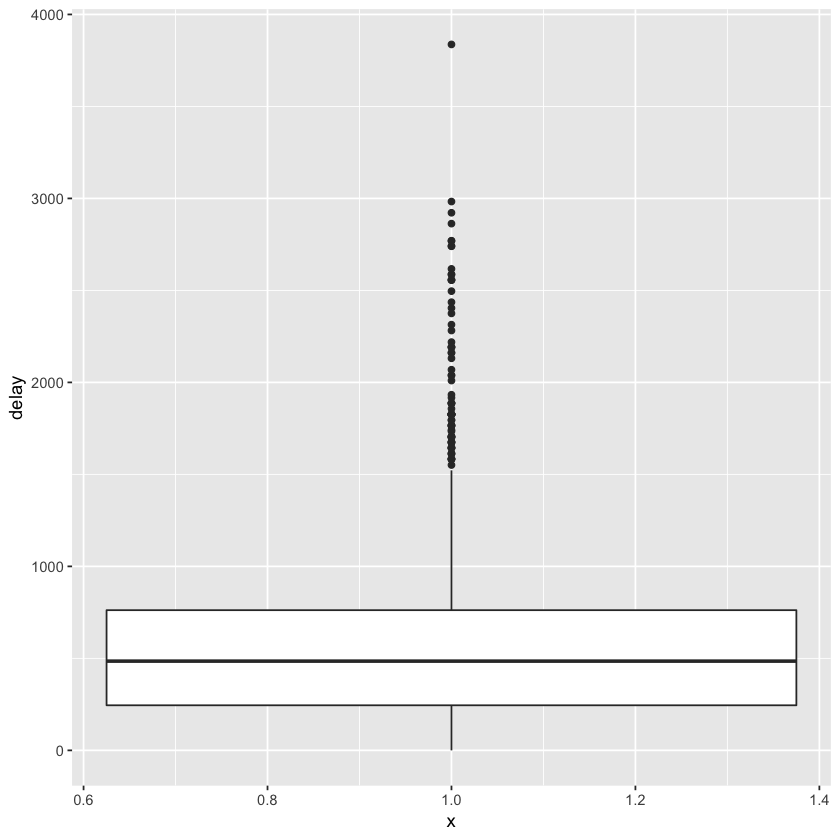

In [29]:
my_foo$delay <- as.numeric(my_foo$RevisedCompletionDate - my_foo$OriginalCompletionDate)
summary(my_foo$delay)
ggplot(my_foo, aes(x=1,y=delay)) + 
  geom_boxplot()

Warning message:
“Removed 21 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 21 rows containing missing values (geom_point).”

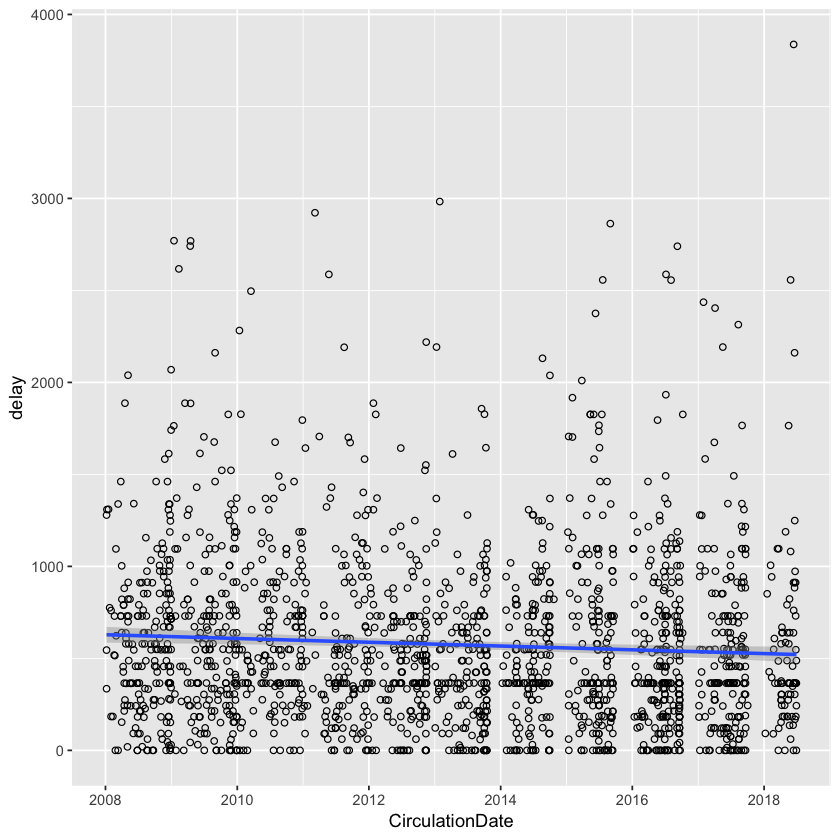

In [30]:
ggplot(my_foo, aes(x=CirculationDate, y=delay)) +
    geom_point(shape=1) +
    geom_smooth(method=lm)

# Question 2

What % of projects that have ratings were rated 0?      
What % were rated 1? What % were rated 2? What % were rated 3?    

Answer these questions using a table or a figure. Provide a title AND an explanatory sentence or two that provides the numerical % results rounded to the nearest percentage-point.    

In [35]:
multi.fun <- function(x) {cbind(percentage = prop.table(table(x))*100,freq = table(x))}
multi.fun(my_foo$Rating)



,percentage,freq
0,2.675227,50
1,15.890851,297
2,68.271803,1276
3,13.162119,246


# Question 3 

Repeat problem 2, but this time exclude all PPTA projects.    

PPTA projects are more prone to negative ratings, because after a certain point in time only the low-rated PPTA projects required ratings.  PPTA stands for "Project Preparatory Technical Assistance" and it is basically a project intended to set up a loan (often a very large multi-million-dollar loan). Only PPTAs that fail to "eventuate" to a loan are rated, which is why they are usually rated negatively.

In [37]:
multi.fun(my_foo[my_foo$Type!='PPTA',]$Rating)

,percentage,freq
0,1.992032,35
1,14.058054,247
2,70.233352,1234
3,13.716562,241


# Question 34

Identify the top 25% of projects by "Revised.Amount" and the bottom 25% of projects by "RevisedAmount". ("RevisedAmount" shows the final project budget.)     


Compare the ratings of these projects. Can you draw a causal conclusion about the effect of budget size on ratings? Why or why not?     


Hint: Compare the characteristics of the two project groupings, e.g., "Dept", "Division", "Cluster", "Country"


Approximate suggested length: 3-5 sentences.

In [42]:
summary(my_foo$RevisedAmount)

my_foo.lowRA <- my_foo[my_foo$RevisedAmount <= 0.4,]

my_foo.highRA <- my_foo[my_foo$RevisedAmount >= 1,]

summary(my_foo.lowRA$RevisedAmount)
summary(my_foo.highRA$RevisedAmount)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0060  0.4000  0.6000  0.9897  1.0000 29.8600 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0060  0.2250  0.2250  0.2713  0.3500  0.4000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.500   2.185   2.000  29.860 

# Question 5             
Imagine your manager asks you to apply Jeremy Howard's drivetrain model to the problem of optimal budget-setting to maximize project success (i.e., "Rating"). 


In such a situation, what would be the:        
(a) decision problem or objective?        
(b) lever or levers?        
(c) ideal RCT design?         
(d) dependent variable(s) and independent variable(s) in the modeler            
(e) And---Why would running RCTs and modeling/optimizing over RCT results be preferable to using (observational, non-RCT) "foo" data?



Approximate suggested length: 1-3 sentences for each sub-question.

(a) maximizing project success (rating)         
(b) budget setting: how many projects to fund; how much to fund each project; type of project to fund; country of project to fund; dept "", division "", loan "", Date??,     
(c) ???????? randomly allocate funds and then record all independent variables and rating (dependent variable). Allows generation of causal data.           
(d) dependent: rating; independent: Status' 'Cluster' 'Prefix' 'Type' 'Country' 'Dept' 'Division' 'LTAA' 'Loan' 'ApprovalDate' 'AgreementDate' 'Agreement' 'EffectivityDate' 'CancellationDate' 'FinancialCompletionDate' 'OriginalCompletionDate' 'RevisedCompletionDate' 'JSF' 'Fund' 'RevisedAmount' 'Rating' 'No' 'PCR' 'CirculationDate'           
(e) Truly randomized: eliminates bias. There may be selection bias within foo (maybe higher funding because predicted higher rating?). This confounded assignment mechanism introduces confounding variables into our data which means that the known dependent variable are skeweed relative to the actual dependent variable. By using RCTs, we eliinate this selection bias allowing us to truly estimate causal effect by reducing dependent variable skew (bias).             